# Análise Exploratória — Desafio Lighthouse  
Este notebook apresenta a exploração inicial dos dados fornecidos, com foco em entender as variáveis, identificar padrões e levantar hipóteses para orientar decisões estratégicas.

In [4]:
%pip install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

df = pd.read_csv(r"C:/Users/sarav/OneDrive/Área de Trabalho/Trabalhos/LightHouse/LH_CD_SARA/data/desafio_indicium_imdb.csv")
df.head()

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------------------------------------ --- 10.0/11.0 MB 50.9 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 41.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   -------------------------- ------------- 8.4/12.8 MB 40.7 MB/s eta 0:00:01
   ---------------------------------------- 12.8/12.8 MB 37.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 8.1/8.1 MB 40.0 MB/s eta 0:00:00
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached cycl

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [5]:
df["Runtime"] = df["Runtime"].str.replace(" min", "", regex=False).astype(float)

df["Gross"] = df["Gross"].str.replace(",", "", regex=False).astype(float)

df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors="coerce")

In [6]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  998 non-null    float64
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    float64
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    float64
dtypes: float64(5), int64(2), object(9)
memory usage: 125.0+ KB


Unnamed: 0         0
Series_Title       0
Released_Year      1
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

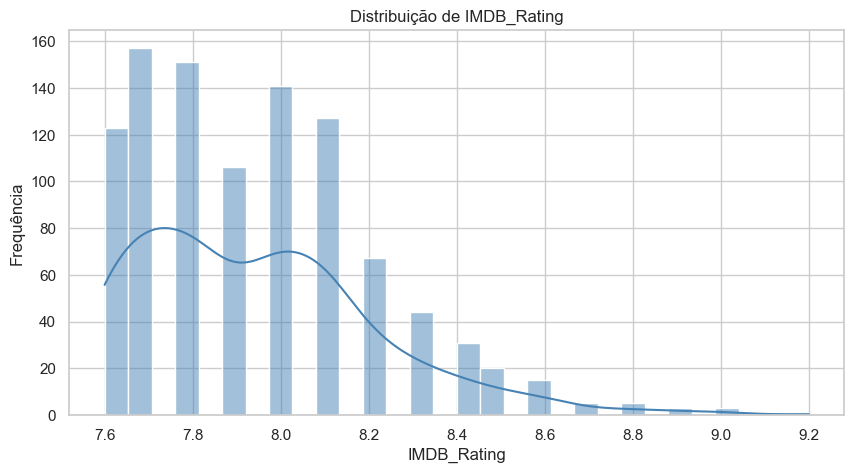

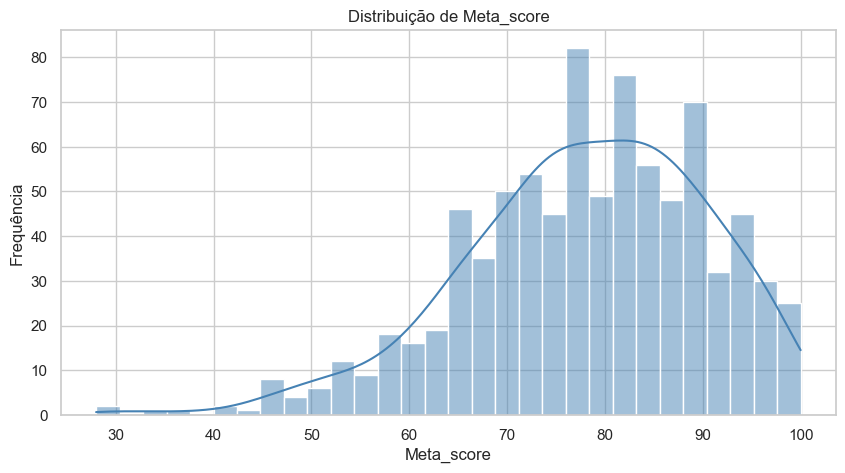

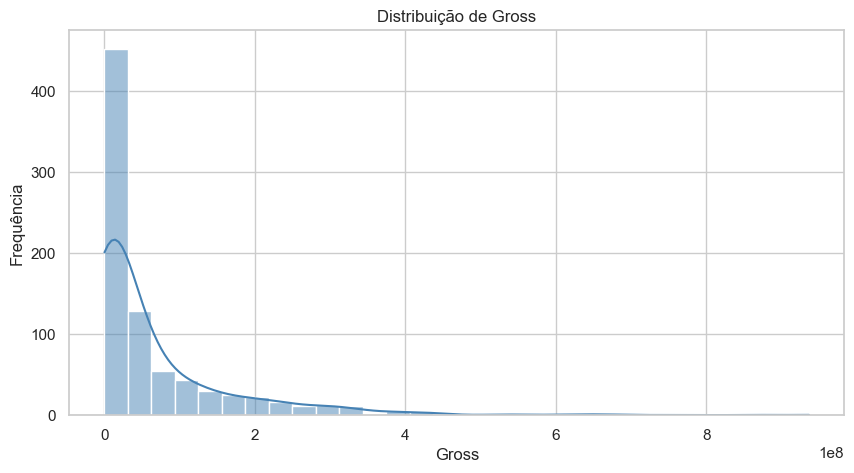

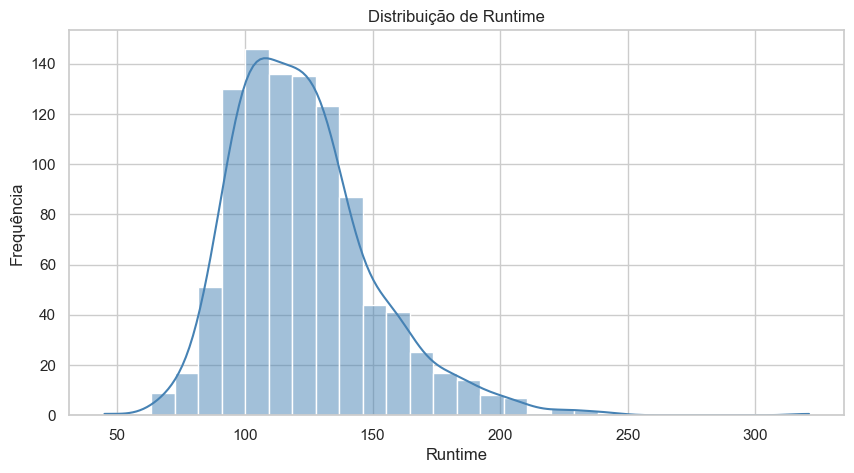

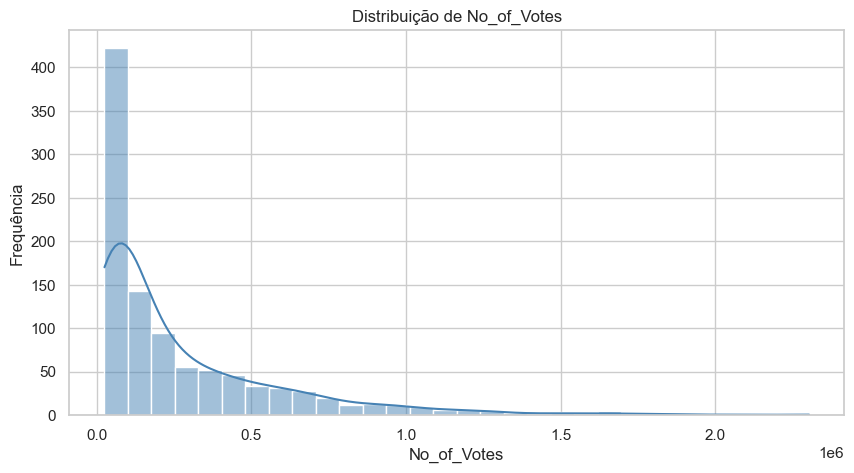

In [7]:
num_cols = ["IMDB_Rating", "Meta_score", "Gross", "Runtime", "No_of_Votes"]

for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30, color="steelblue")
    plt.title(f"Distribuição de {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.show()

C:\Users\sarav\AppData\Local\Temp\ipykernel_26828\39168022.py:13: UserWarning: Glyph 128253 (\N{FILM PROJECTOR}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\sarav\AppData\Local\Temp\ipykernel_26828\39168022.py:13: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\sarav\OneDrive\Área de Trabalho\Trabalhos\LightHouse\LH_CD_SARA\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128253 (\N{FILM PROJECTOR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sarav\OneDrive\Área de Trabalho\Trabalhos\LightHouse\LH_CD_SARA\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


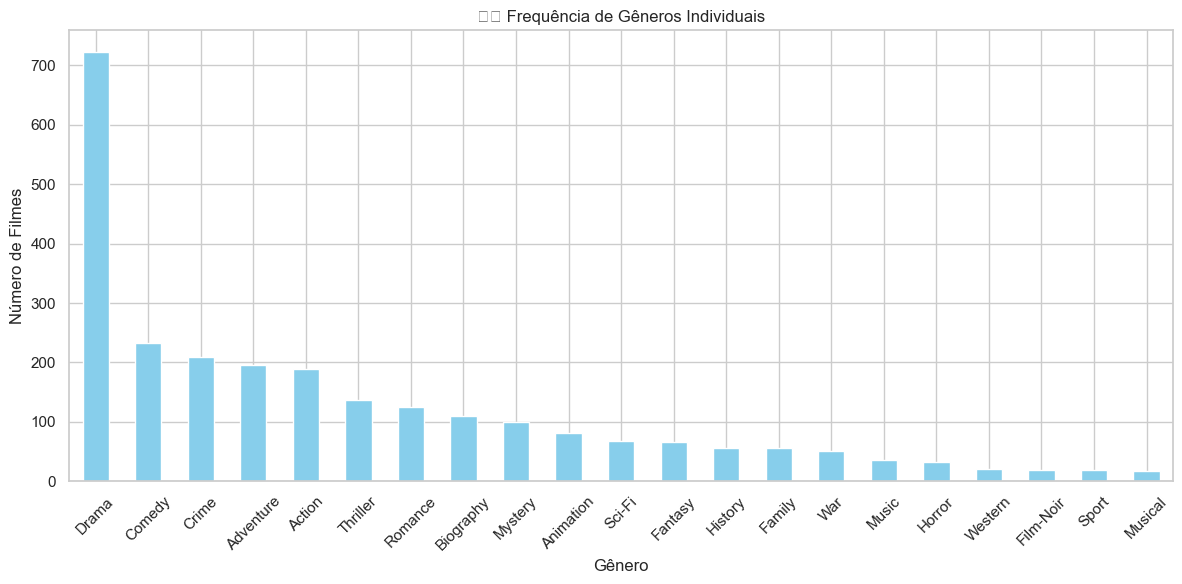

In [8]:
generos_separados = df["Genre"].dropna().str.split(", ")
todos_generos = [g for sublist in generos_separados for g in sublist]

contagem = Counter(todos_generos)
genero_freq = pd.Series(contagem).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
genero_freq.plot(kind="bar", color="skyblue")
plt.title("📽️ Frequência de Gêneros Individuais")
plt.xlabel("Gênero")
plt.ylabel("Número de Filmes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\sarav\AppData\Local\Temp\ipykernel_26828\363361499.py:7: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\sarav\OneDrive\Área de Trabalho\Trabalhos\LightHouse\LH_CD_SARA\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


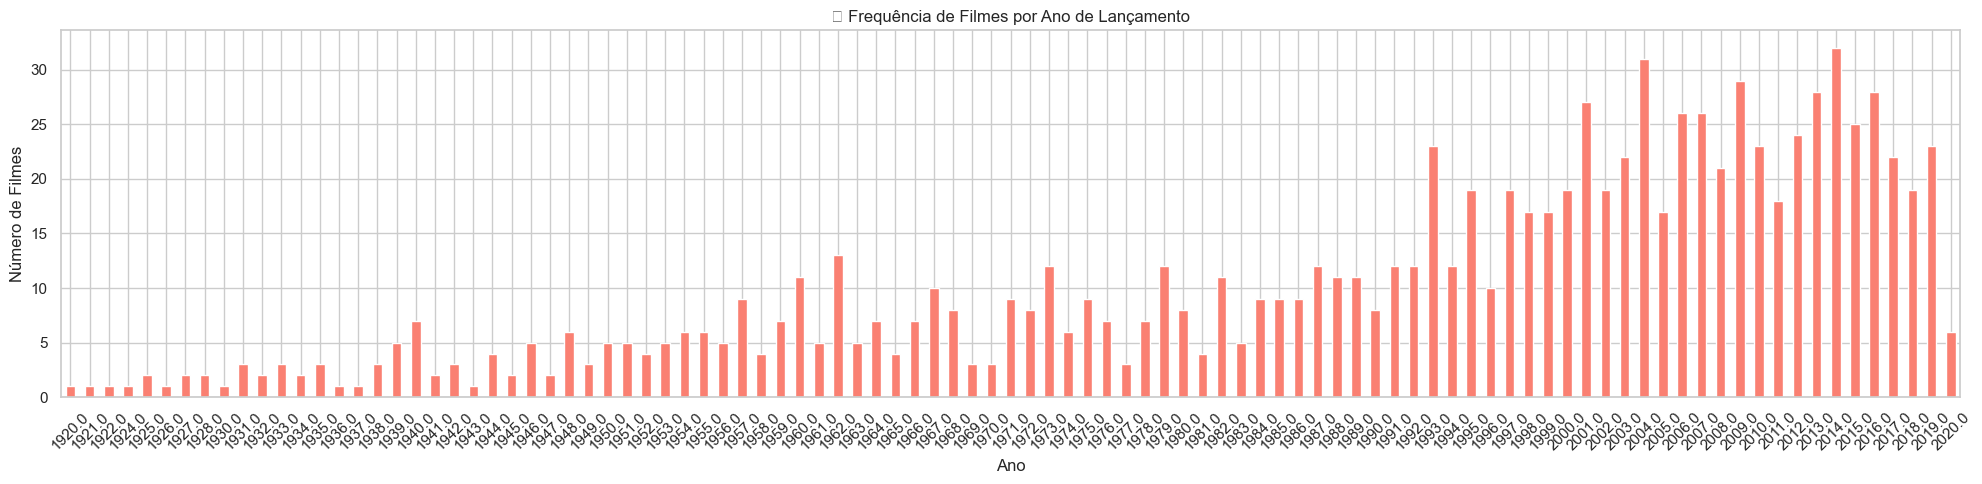

In [9]:
plt.figure(figsize=(20, 5))
df["Released_Year"].value_counts().sort_index().plot(kind="bar", color="salmon")
plt.title("📅 Frequência de Filmes por Ano de Lançamento")
plt.xlabel("Ano")
plt.ylabel("Número de Filmes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\sarav\AppData\Local\Temp\ipykernel_26828\12072992.py:13: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\sarav\OneDrive\Área de Trabalho\Trabalhos\LightHouse\LH_CD_SARA\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


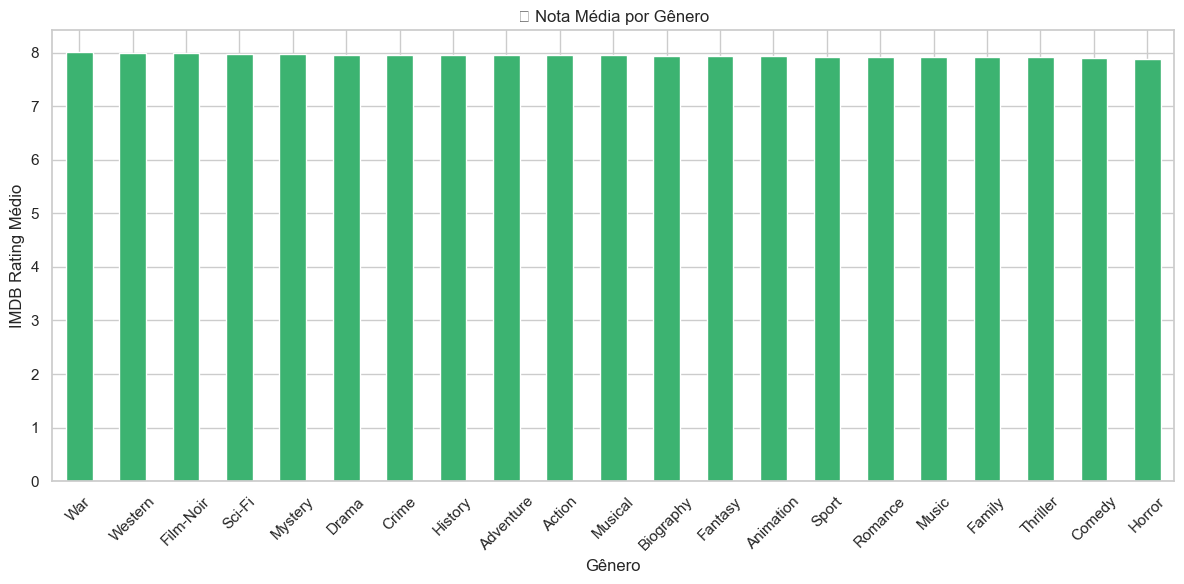

In [10]:
df_generos = df.dropna(subset=["Genre", "IMDB_Rating"]).copy()
df_generos["Genre"] = df_generos["Genre"].str.split(", ")
df_exploded = df_generos.explode("Genre")

nota_media = df_exploded.groupby("Genre")["IMDB_Rating"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
nota_media.plot(kind="bar", color="mediumseagreen")
plt.title("⭐ Nota Média por Gênero")
plt.xlabel("Gênero")
plt.ylabel("IMDB Rating Médio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

c:\Users\sarav\OneDrive\Área de Trabalho\Trabalhos\LightHouse\LH_CD_SARA\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


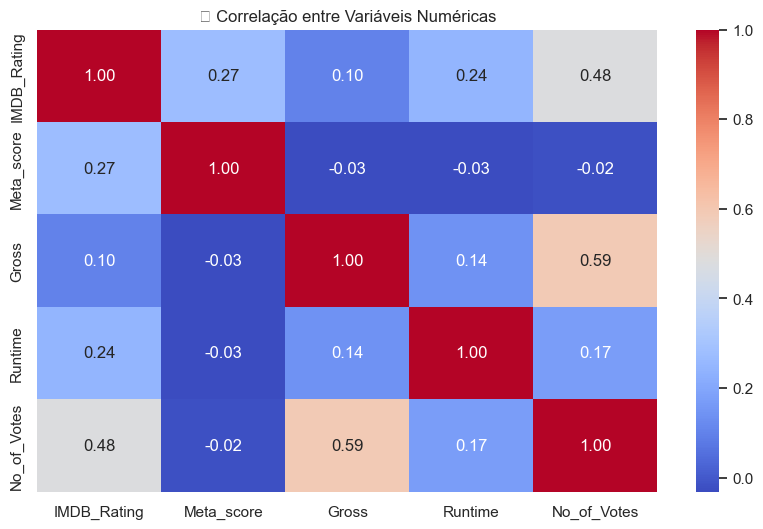

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔗 Correlação entre Variáveis Numéricas")
plt.show()

## Hipóteses

**1. Quais variáveis parecem influenciar a nota?**
- O `Meta_score` tem uma relação positiva com o `IMDB_Rating`, ou seja, filmes com meta score mais alto tendem a ter notas maiores no IMDB.

- O tempo de duração (`Runtime`) também pode influenciar positivamente a nota, pois filmes mais longos costumam receber avaliações melhores.

- O número de votos (`No_of_Votes`) pode indicar popularidade, mas não necessariamente qualidade.

**2. Quais gêneros têm maior faturamento?**
- gêneros como `Action`, `Adventure` e `Sci-Fi` tendem a apresentar maior faturamento.

**3. Existe relação entre tempo de duração e nota?**
- Sim, filmes com maior tempo de duração (`Runtime`) tendem a ter notas médias mais altas no IMDB.

## Análises Solicitadas

A seguir, apresento visualizações e análises para sustentar as hipóteses acima:


Correlação das variáveis numéricas com IMDB_Rating:
IMDB_Rating      1.000000
No_of_Votes      0.479308
Meta_score       0.271374
Runtime          0.242751
Gross            0.099393
Released_Year   -0.133257
Unnamed: 0      -0.946472
Name: IMDB_Rating, dtype: float64


C:\Users\sarav\AppData\Local\Temp\ipykernel_26828\1553712935.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.index, y=corr.values, palette="viridis")


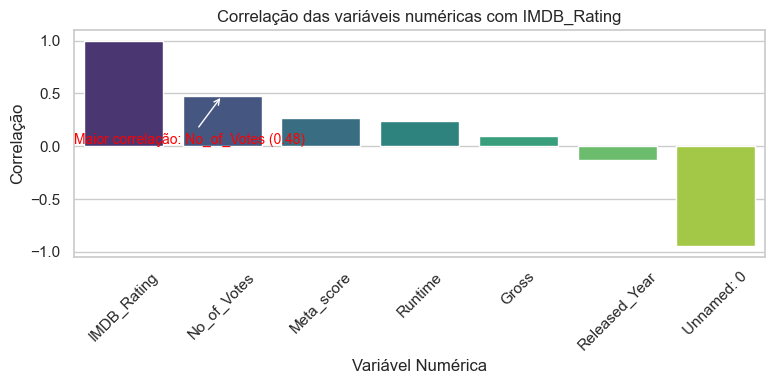

In [12]:
# Correlação entre variáveis numéricas e nota (IMDB_Rating)
num_cols = df.select_dtypes(include='number').columns
corr = df[num_cols].corr()["IMDB_Rating"].sort_values(ascending=False)
print("Correlação das variáveis numéricas com IMDB_Rating:")
print(corr)
max_corr_var = corr.index[1] if corr.index[0] == "IMDB_Rating" else corr.index[0]
max_corr_value = corr[max_corr_var]
plt.figure(figsize=(8,4))
sns.barplot(x=corr.index, y=corr.values, palette="viridis")
plt.title("Correlação das variáveis numéricas com IMDB_Rating")
plt.ylabel("Correlação")
plt.xlabel("Variável Numérica")
plt.xticks(rotation=45)
plt.tight_layout()
plt.annotate(f'Maior correlação: {max_corr_var} ({max_corr_value:.2f})', xy=(corr.index.get_loc(max_corr_var), max_corr_value), xytext=(0,0.5), textcoords='axes fraction', arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10, color='red')
plt.show()

Gêneros com maior faturamento médio:
Genre
Adventure    1.657313e+08
Sci-Fi       1.480264e+08
Action       1.412393e+08
Animation    1.279675e+08
Fantasy      1.086168e+08
Family       9.293266e+07
Comedy       6.412530e+07
Thriller     5.867663e+07
History      5.553953e+07
Biography    5.525602e+07
Name: Gross, dtype: float64


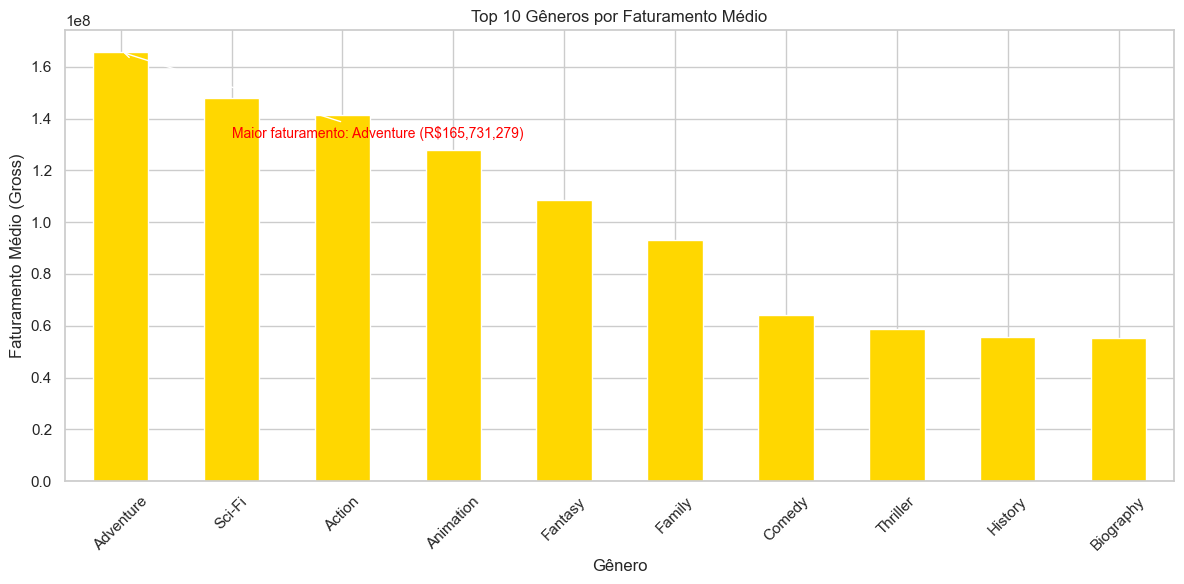

In [13]:
# Gêneros com maior faturamento (Gross)
df_generos_gross = df.dropna(subset=["Genre", "Gross"]).copy()
df_generos_gross["Genre"] = df_generos_gross["Genre"].str.split(", ")
df_exploded_gross = df_generos_gross.explode("Genre")
gross_por_genero = df_exploded_gross.groupby("Genre")["Gross"].mean().sort_values(ascending=False)
print("Gêneros com maior faturamento médio:")
print(gross_por_genero.head(10))
top_genero = gross_por_genero.index[0]
top_gross = gross_por_genero.iloc[0]
plt.figure(figsize=(12,6))
gross_por_genero.head(10).plot(kind="bar", color="gold")
plt.title("Top 10 Gêneros por Faturamento Médio")
plt.xlabel("Gênero")
plt.ylabel("Faturamento Médio (Gross)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.annotate(f'Maior faturamento: {top_genero} (R${top_gross:,.0f})', xy=(0, top_gross), xytext=(1, top_gross*0.8), arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10, color='red')
plt.show()

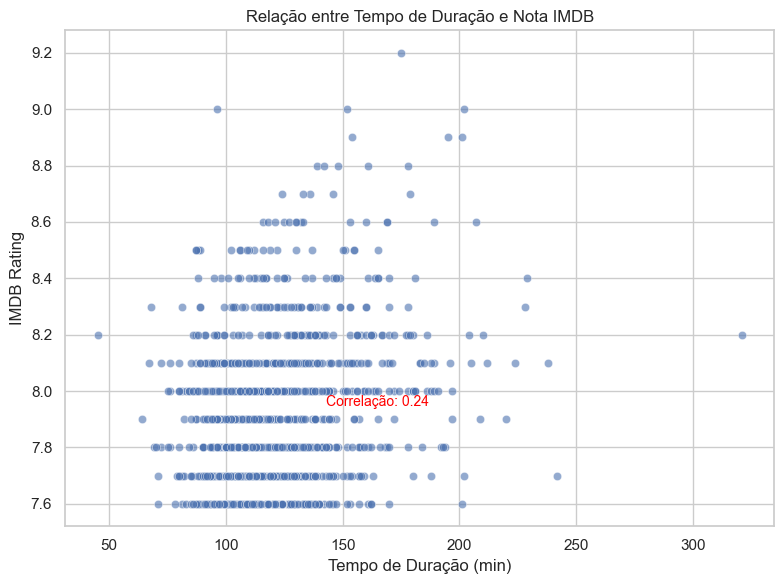

Correlação entre tempo de duração e nota: 0.24


In [14]:
# Relação entre tempo de duração (Runtime) e nota (IMDB_Rating)
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Runtime"], y=df["IMDB_Rating"], alpha=0.6)
plt.title("Relação entre Tempo de Duração e Nota IMDB")
plt.xlabel("Tempo de Duração (min)")
plt.ylabel("IMDB Rating")
plt.tight_layout()
correlacao_runtime_rating = df[["Runtime", "IMDB_Rating"]].corr().iloc[0,1]
plt.annotate(f'Correlação: {correlacao_runtime_rating:.2f}', xy=(df["Runtime"].mean(), df["IMDB_Rating"].mean()), xytext=(df["Runtime"].mean()+20, df["IMDB_Rating"].mean()), arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10, color='red')
plt.show()
print(f"Correlação entre tempo de duração e nota: {correlacao_runtime_rating:.2f}")

C:\Users\sarav\AppData\Local\Temp\ipykernel_26828\44561128.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Genre", y="IMDB_Rating", data=df_exploded_box, palette="Set3")


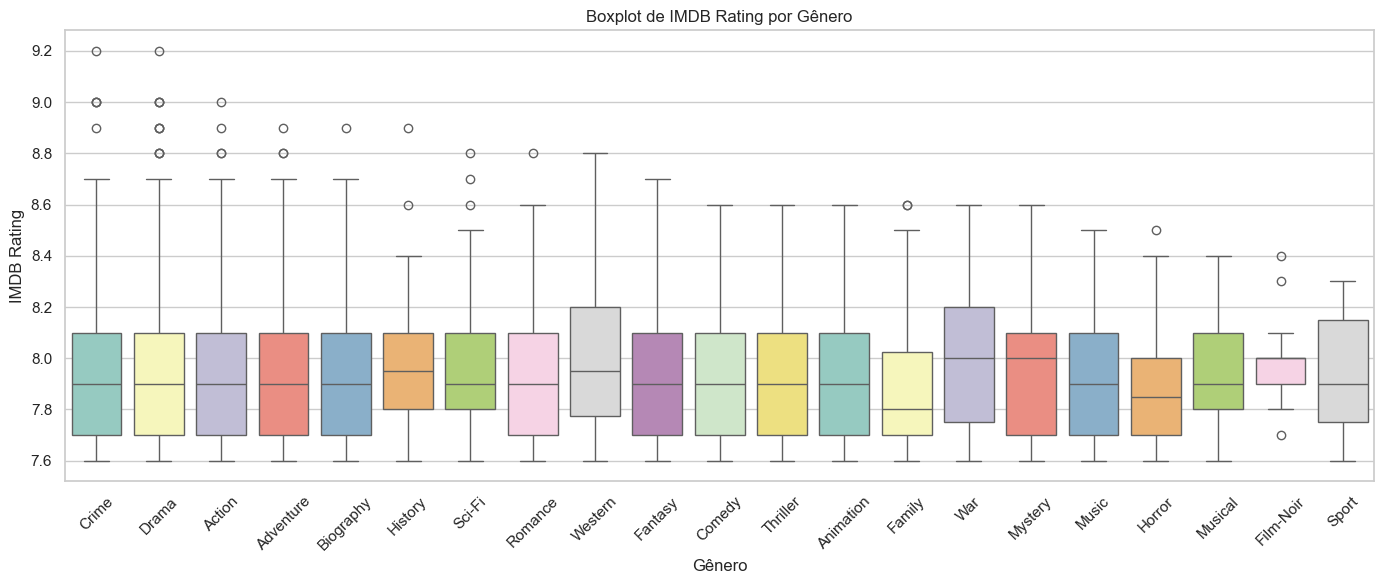

C:\Users\sarav\AppData\Local\Temp\ipykernel_26828\44561128.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Certificate", y="IMDB_Rating", data=df, palette="Set2")


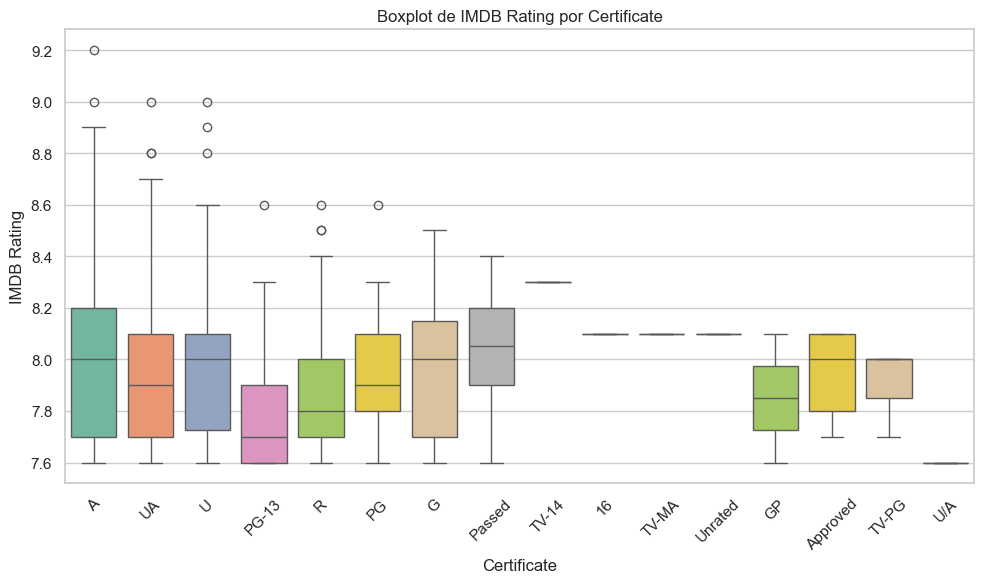

C:\Users\sarav\AppData\Local\Temp\ipykernel_26828\44561128.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Released_Year", y="IMDB_Rating", data=df, palette="Set1")


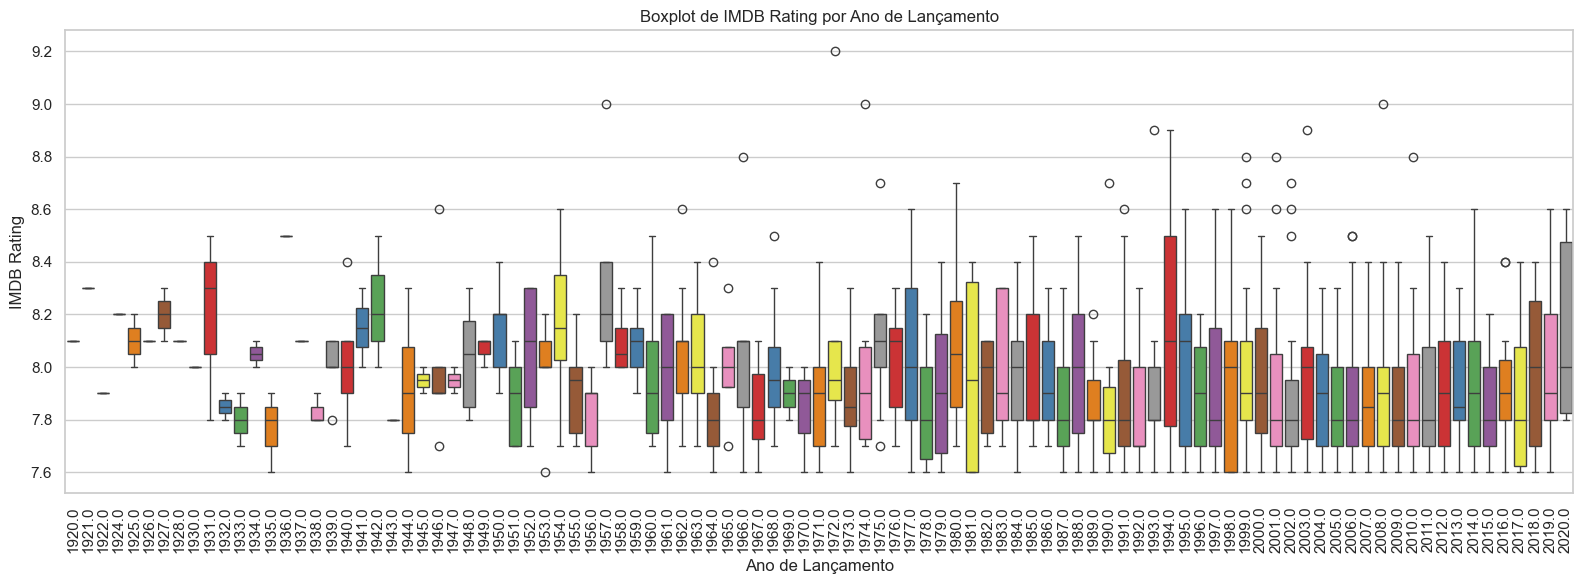

In [15]:
# Boxplot de IMDB_Rating por Gênero
df_box_genre = df.dropna(subset=["Genre", "IMDB_Rating"]).copy()
df_box_genre["Genre"] = df_box_genre["Genre"].str.split(", ")
df_exploded_box = df_box_genre.explode("Genre")
plt.figure(figsize=(14, 6))
sns.boxplot(x="Genre", y="IMDB_Rating", data=df_exploded_box, palette="Set3")
plt.title("Boxplot de IMDB Rating por Gênero")
plt.xlabel("Gênero")
plt.ylabel("IMDB Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boxplot de IMDB_Rating por Certificate
plt.figure(figsize=(10, 6))
sns.boxplot(x="Certificate", y="IMDB_Rating", data=df, palette="Set2")
plt.title("Boxplot de IMDB Rating por Certificate")
plt.xlabel("Certificate")
plt.ylabel("IMDB Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boxplot de IMDB_Rating por Released_Year
plt.figure(figsize=(16, 6))
sns.boxplot(x="Released_Year", y="IMDB_Rating", data=df, palette="Set1")
plt.title("Boxplot de IMDB Rating por Ano de Lançamento")
plt.xlabel("Ano de Lançamento")
plt.ylabel("IMDB Rating")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()